In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load the messages and labels

In [5]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0], encoding='latin-1')


df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


Saving spam.csv to spam (4).csv


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Preprocess the text (lowercasing, remove stopwords, tokenization)

In [7]:
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df["clean_message"] = df["message"].apply(preprocess)
df.head()

,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


# Convert text into numeric features

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_message"])

y = df["label"].map({"ham": 0, "spam": 1})


# Split into train/test sets.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train a simple model (Naive Bayes)

In [10]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# Measure performance with accuracy, precision, or F1 score

In [11]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.967713004484305
Precision: 1.0
F1 Score: 0.8636363636363636


# Result

In [12]:
def predict_spam(msg):
    clean = preprocess(msg)
    vector = vectorizer.transform([clean])
    prediction = model.predict(vector)[0]
    return "SPAM" if prediction == 1 else "HAM"

print(predict_spam("Congratulations! You won a free cash prize."))
print(predict_spam("Hey bro, when are we meeting?"))


SPAM
HAM


# With Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=2000)

logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.947085201793722
Precision: 0.9595959595959596
F1 Score: 0.7630522088353414


In [16]:
def predict_spam_lr(msg):
    clean = preprocess(msg)
    vector = vectorizer.transform([clean])
    pred = logreg_model.predict(vector)[0]
    return "SPAM" if pred == 1 else "HAM"

print(predict_spam_lr("FREE FREE FREE, you won cash!!!"))
print(predict_spam_lr("Bro what time class?"))


SPAM
HAM


# Comparison Of Results

In [19]:
# Naive Bayes metrics
nb_acc = accuracy_score(y_test, y_pred)
nb_prec = precision_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

# Logistic Regression metrics
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)


In [20]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [nb_acc, lr_acc],
    "Precision": [nb_prec, lr_prec],
    "F1 Score": [nb_f1, lr_f1]
})

comparison_df


,Model,Accuracy,Precision,F1 Score
0,Naive Bayes,0.967713,1.000000,0.863636
1,Logistic Regression,0.947085,0.959596,0.763052


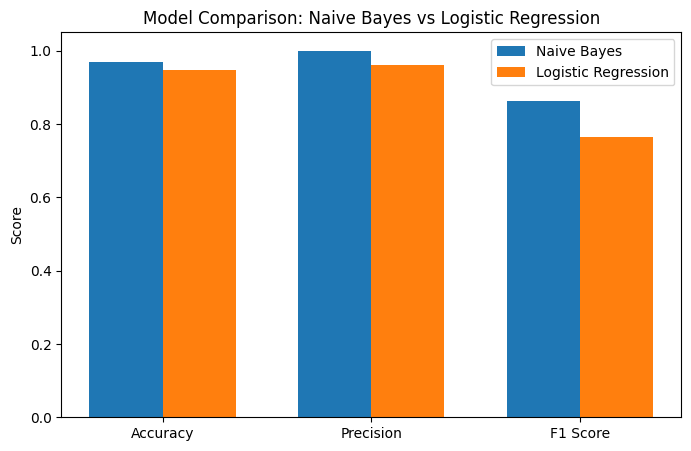

In [21]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Accuracy", "Precision", "F1 Score"]
nb_scores = [nb_acc, nb_prec, nb_f1]
lr_scores = [lr_acc, lr_prec, lr_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, nb_scores, width, label='Naive Bayes')
plt.bar(x + width/2, lr_scores, width, label='Logistic Regression')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Comparison: Naive Bayes vs Logistic Regression")
plt.legend()
plt.show()
